In [1]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [2]:
names = ['id', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 
         'feature_7', 'feature_8', 'feature_9', 'feature_10', 'target_x', 'target_y','target_z']

df = pd.read_csv("/Users/HP/Desktop/UNI/LM_1/MachineLearning/ML_prj/data/ML-CUP23-TR.csv", names=names, comment='#')

In [3]:
targets = ['target_x', 'target_y', 'target_z']
features = list(set(names) - {'id', 'target_x', 'target_y', 'target_z'})

In [29]:
prova = df[0:100]

In [30]:
X_train, y = prova[features].to_numpy(), prova[targets].to_numpy()

In [15]:
y.shape

(100, 3)

In [58]:
X_train, y = prova[features].to_numpy(), prova[targets].to_numpy()

def linear(x):
    '''Linear activation function'''
    return x

def sigmoid(x):
    '''Sigmoid activation function'''
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

def d_linear(x):
    return 1

layers_a = []
layers_z = []
weights = []
biases = []

d_weights = []
d_biases = []

N = 100 #batch dimension
input_dim = 10
hidden_dim = 4
output_dim = 3
layer_dim = [hidden_dim, output_dim]

for i in range(len(layer_dim)):
    layers_a.append(np.empty((layer_dim[i],N)))
    layers_z.append(np.empty((layer_dim[i],N)))

input = X_train.T
y = y.T

w_ji = np.random.uniform(-0.3,0.3,(hidden_dim,input_dim))
weights.append(w_ji)
d_weights.append(np.empty((hidden_dim,input_dim)))
w_kj = np.random.uniform(-0.3,0.3,(output_dim,hidden_dim))
weights.append(w_kj)
d_weights.append(np.empty((output_dim,hidden_dim)))

b_j = np.ones((hidden_dim,1))
biases.append(b_j)
d_biases.append(np.empty((hidden_dim,1)))
b_k = np.ones((output_dim,1))
biases.append(b_k)
d_biases.append(np.empty((output_dim,1)))

act_functions = [sigmoid, linear]
d_act_functions = [d_sigmoid, d_linear]
o = 0
E = []
while o<10000:
    print(f'o = {o}')
    #forward propagation
    for l in range(len(layer_dim)):
        if l == 0:
            layers_z[l] = weights[l] @ input + biases[l]
            layers_a[l] = act_functions[l](layers_z[l])
        else:
            layers_z[l] = weights[l] @ layers_a[l-1] + biases[l]
            layers_a[l] = act_functions[l](layers_z[l])

    deltas = []
    deltas.append(np.empty((hidden_dim,N)))
    deltas.append(np.empty((output_dim,N)))

    #error calculation
    e = ((layers_a[-1][0]-y[0])**2+(layers_a[-1][1]-y[1])**2+(layers_a[-1][2]-y[2])**2).mean()
    E.append(e)

    #backpropagation
    for l in range(len(layer_dim)-1,-1,-1):
        if l == len(layer_dim)-1:
            tmp = (layers_a[l]-y)/y.shape[1]
            deltas[l] = 2*d_act_functions[l](layers_z[l])*tmp
        else:
            deltas[l] = weights[l+1].T @ deltas[l+1]

    for i in range(len(d_weights)):
        if i == 0:
            d_weights[i] = deltas[i] @ input.T
            d_biases[i] = deltas[i].sum(axis=1).reshape((deltas[i].shape[0],1))
        else: 
            d_weights[i] = deltas[i] @ layers_a[i-1].T
            d_biases[i] = deltas[i].sum(axis=1).reshape((deltas[i].shape[0],1))

    print(d_weights[0])
    print(d_weights[1].shape)
    print(d_biases[0].shape)
    print(d_biases[1].shape)
    #weight update
    eta = 0.1
    for i in range(len(weights)):
        weights[i] = weights[i] - d_weights[i]*eta
        biases[i] = biases[i] - d_biases[i]*eta

    o += 1

o = 0
[[  1.87521621  -6.02952607   3.02003881  -7.57338996   5.46124948
   -4.82127452  -1.8877074    0.79680279  -0.89469573   8.76680036]
 [  2.87558904  -1.96167133  -4.09279065  -0.19111283  -1.07654555
    4.99377822   6.12430574  -1.52309395  -0.93326969  -2.71227374]
 [ -2.1232474    3.18614246   7.28300165   2.06121119   3.0614847
   -4.10565695  -8.15033646   2.08684605  -0.52074045   1.47519902]
 [ -4.94296367  -4.05278283  -4.10505498  -8.77217118  -2.79690413
  -10.55460527  -1.46381086   0.30829905   5.30905661  10.62213376]]
(3, 4)
(4, 1)
(3, 1)
o = 1
[[  18.87377184  -82.4917284   -77.72639427 -101.17151297   -5.32397899
   -22.5181517    71.58803715    0.76643547   42.52283186   65.68823277]
 [  24.51868628  -81.45109394  -99.48703383  -93.15980247  -19.18490137
    -0.51517132   96.683563     -5.43105117   43.4727334    45.41236813]
 [  20.10820412  -81.62136093  -91.00220744  -97.79436724  -14.3935557
   -12.88520062   84.7132978    -1.934604     45.53343644   55.755

C:\Users\HP\AppData\Local\Temp\ipykernel_12628\3086704268.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


[[  -4.5500924   -31.31039465   44.70725754   -5.91790791  108.39285875
   -83.27608221  -50.1472662    -5.91902757  -36.50969464   52.55048965]
 [  68.17163187  -98.23416621  -67.95994237  -55.38416977 -103.45809423
   209.69021411  146.10803723 -100.99002403  -18.71368011  -46.23668881]
 [  -1.20635419  -63.9766684   -14.31697049  -45.6903044    57.76931375
   -48.2208567     1.62054526  -19.27925318   19.16885056   52.60186878]
 [ -16.07090223  -75.13290472 -124.42067991  -97.99032579  -57.24272843
   -11.86302472   74.05041298   -6.45931593  148.62145724   41.51098828]]
(3, 4)
(4, 1)
(3, 1)
o = 240
[[  -4.58329771  -30.91529369   44.79918967   -5.11776707  108.37093664
   -82.80696047  -50.10351721   -6.02084196  -36.75643046   51.65079853]
 [  68.10300331  -98.82543419  -67.8775753   -56.25323107 -103.25123255
   209.0944422   145.9883729  -101.01601941  -18.56099198  -45.26783686]
 [  -1.33779016  -63.80490059  -14.30451214  -45.25288822   57.67367367
   -47.98056226    1.6482544

In [60]:
layers_a[-1]

array([[ 14.93173914, -19.25166267,   2.64070946, -53.01925615,
         14.93173914, -53.01925615,  22.61279296,   2.64070946,
        -11.15480052,   2.64070946,   2.64070946,  10.32176328,
        -19.25166267, -11.15480052,  -3.47374671, -53.01925615,
        -11.15480052, -45.33820233, -26.93271649,   2.64070946,
        -11.15480052, -53.01925615, -40.72822647,  14.93173914,
        -26.93271649, -19.25166267, -53.01925615,   2.64070946,
        -19.25166267, -11.15480052, -11.15480052, -19.25166267,
        -40.72822647,  -3.47374671, -33.04717265,   2.64070946,
          2.64070946, -40.72822647,  10.32176328, -26.93271649,
         14.93173914,  10.32176328, -53.01925615, -11.15480052,
         14.93173914, -26.93271649,  14.93173914,  10.32176328,
          2.64070946, -11.15480052,   2.64070946, -11.15480052,
        -26.93271649, -53.01925615, -53.01925615,  22.61279296,
         10.32176328,  10.32176328,   2.64070946,  10.32176328,
        -11.15480052,  10.32176328,  10.

In [47]:
len(E)

100

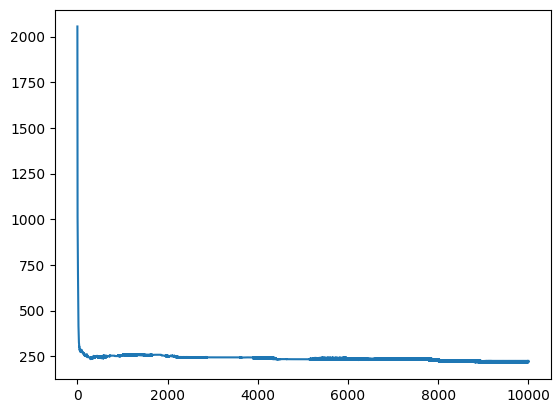

In [59]:
plt.plot(np.array(E))


In [ ]:
plt.plot(E[0])
plt.plot(E[0])